In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import matplotlib
%matplotlib inline

**Import Dataset**

In [3]:
dataset=datasets.fetch_openml('mnist_784')

In [ ]:
dataset

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
data,label=dataset.data,dataset.target

In [5]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
label=label.astype(int)

In [8]:
label

array([5, 0, 4, ..., 4, 5, 6])

In [9]:
data.shape

(70000, 784)

In [10]:
label.shape

(70000,)

**Chhose One digit for analysis**

In [11]:
choose_one_digit=data[6700]

In [12]:
image=choose_one_digit.reshape(28,28)

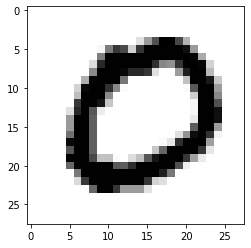

In [13]:
plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [14]:
#choose_one_digit=data[2600]
label[2600]

9

**Split Dataset in Train and Test**

In [15]:
x_train,y_train=data[:2500],label[:2500]

In [16]:
x_test,y_test=data[2500:5000],label[2500:5000]


**The next step is to create a Linear SVM object. Since there are 10 digits (0-9), we need a multi-class classifier. The Linear SVM that comes with sklearn can perform multi-class classification.**

In [17]:
clf=LinearSVC()

In [18]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
clf.predict(data[1:10])

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

In [20]:
label[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

**As we can see, our predicted value and actual value are same. So, we conclude that our model is working some how perfectly.**

**Now, Lets calculate accuracy of this LinearSVC classification.**

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
a=cross_val_score(clf,x_train,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
a.mean()

0.8204029813364194

**--> Create a 9 detector model using Logisctic regression**

In [24]:
y_train_9=(y_train==9)

In [25]:
y_train_9

array([False, False, False, ..., False, False, False])

In [26]:
y_test_9=(y_test==9)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf2=LogisticRegression()

In [29]:
clf2.fit(x_train,y_train_9)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#choose_one_digit is original Nine 
clf2.predict([choose_one_digit])

array([False])

**We can conclude that predicted value for this image nine is true.**
**Now, Lets calculate accuracy of this Logistic Regression classification.**

In [31]:
b=cross_val_score(clf,x_train,y_train_9,cv=3,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
b

array([0.93045564, 0.92797119, 0.92557023])

In [33]:
b.mean()

0.9279990173527445

In [34]:
#choose_one_digit=6700 label=0
clf2.predict([choose_one_digit])

array([False])

**It's shows value is false. that means this digit is not 9 digit.**

In [35]:
label[6700]

0

**Conclusion**:


**Average Accuracy of LinearSCV= 0.82**

**Average Accuracy of Logistic Regression= 0.93**